# evaluate

> Evaluate our predictions

In [1]:
#| default_exp evaluate

In [2]:
#| export
from pathlib import Path
from sklearn import metrics
import numpy as np
import pandas as pd

In [3]:
data_dir = Path("../data")
assert data_dir.exists()

In [4]:
predictions_10k_path = data_dir / 'predictions_2k.csv'
assert predictions_10k_path.exists()

predictions_10k = pd.read_csv(predictions_10k_path)
predictions_10k.loc[:, 'pred'] = predictions_10k.pred.str.strip()
predictions_10k.loc[:, 'label'] = predictions_10k.label.str.strip()
predictions_10k.head()

,pred,label,idx
0,Billing / Invoice,Order Processing,37508
1,Billing / Invoice,Order Processing,1092
2,Order Processing,Order Processing,33786
3,Order Processing,Delivery,20135
4,Billing / Invoice,Order Processing,29323


In [6]:
performance_10k_kwargs = {
    'y_true': predictions_10k.label,
    'y_pred': predictions_10k.pred
}

In [5]:
sample_predictions_path = data_dir / 'sample_predictions.csv'
assert sample_predictions_path.exists()

predictions = pd.read_csv(sample_predictions_path)
predictions.loc[:, 'pred'] = predictions.pred.str.strip()
predictions.loc[:, 'label'] = predictions.label.str.strip()
predictions.head()

,pred,label,idx
0,Order Discrepancy,Billing / Invoice,50493
1,Order Processing,General Inquiry,13780
2,Account/Inquiry,Account/Inquiry,4943
3,Delivery,Account/Inquiry,37088
4,Billing / Invoice,Billing / Invoice,47271


In [15]:
performance_kwargs = {
    'y_true': predictions.label,
    'y_pred': predictions.pred
}

Accuracy

In [16]:
metrics.accuracy_score(
    **performance_kwargs
)

0.67

In [17]:
metrics.accuracy_score(
    **performance_10k_kwargs
)

0.25417339795368876

Classification report

In [18]:
performance_report_str = metrics.classification_report(
    zero_division=np.nan,
    output_dict=False,
    **performance_kwargs)
print(performance_report_str)

                      precision    recall  f1-score   support

     Account/Inquiry       0.94      0.76      0.84        21
   Billing / Invoice       0.33      0.50      0.40         4
             Credits       0.00      0.00       nan         2
            Delivery       0.33      0.33      0.33         3
     General Inquiry       0.33      0.10      0.15        10
   Order Discrepancy       0.43      0.86      0.57         7
    Order Processing       0.90      0.85      0.88        41
             Pricing       0.00       nan       nan         0
     Product Inquiry       0.67      0.40      0.50         5
Program / Promotions       0.00       nan       nan         0
             Returns       0.57      0.57      0.57         7

            accuracy                           0.67       100
           macro avg       0.41      0.49      0.53       100
        weighted avg       0.73      0.67      0.70       100



In [19]:
performance_10k_report_str = metrics.classification_report(
    zero_division=np.nan,
    output_dict=False,
    **performance_10k_kwargs)
print(performance_10k_report_str)

                      precision    recall  f1-score   support

     Account/Inquiry       0.14      0.03      0.05       390
   Billing / Invoice       0.04      0.14      0.06        74
             Credits       0.06      0.10      0.07        31
            Delivery       0.01      0.02      0.01        62
     General Inquiry       0.18      0.04      0.06       178
   Order Discrepancy       0.13      0.14      0.13       132
    Order Processing       0.41      0.55      0.47       749
             Pricing       0.00      0.00       nan         7
     Product Inquiry       0.04      0.03      0.04       101
Program / Promotions       0.00      0.00       nan         7
             Returns       0.09      0.06      0.07       126

            accuracy                           0.25      1857
           macro avg       0.10      0.10      0.11      1857
        weighted avg       0.23      0.25      0.23      1857



Confusion Matrix

In [20]:
matrix = metrics.confusion_matrix(
    **performance_10k_kwargs
)
matrix.diagonal()/matrix.sum(axis=1)

array([0.03333333, 0.13513514, 0.09677419, 0.01612903, 0.03932584,
       0.14393939, 0.54606142, 0.        , 0.02970297, 0.        ,
       0.05555556])

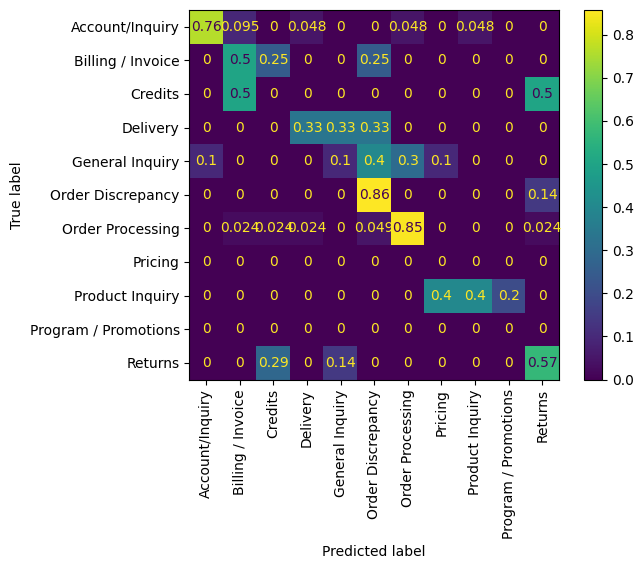

In [21]:
matrix_display = metrics.ConfusionMatrixDisplay.from_predictions(
    normalize='true',
    xticks_rotation='vertical',
    **performance_kwargs
)

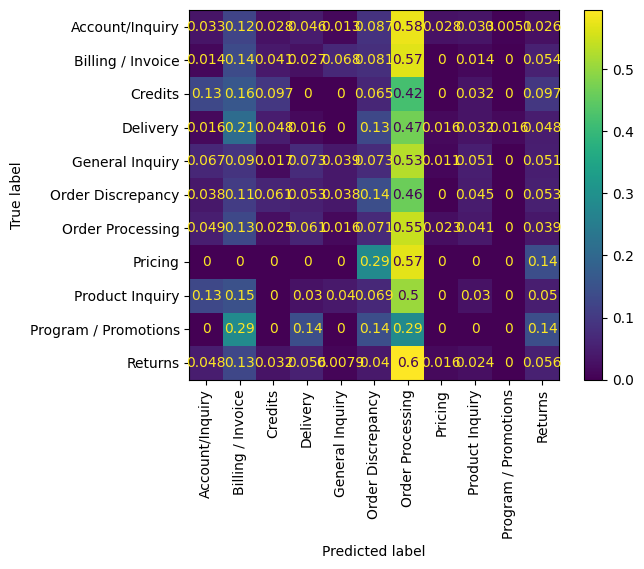

In [22]:
matrix_10k_display = metrics.ConfusionMatrixDisplay.from_predictions(
    normalize='true',
    xticks_rotation='vertical',
    **performance_10k_kwargs
)

In [1]:
#| hide
import nbdev; nbdev.nbdev_export()